<a href="https://colab.research.google.com/github/DineshDhakar1997/GRIP/blob/master/Tsk%202%3A%20simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Simple Linear Regression**


**Importing necessary Libraries.**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

Reading data from given link

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print(data.head(),  len(data))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30 25


Plotting the distribution of scores using matplotlib

Text(0, 0.5, 'Score')

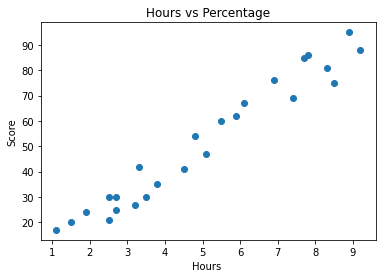

In [3]:
plt.scatter(data.Hours,data.Scores)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours ')  
plt.ylabel('Score')  


From here we can conclude that the data is almost linearly scattered.

Dividing the data into inputs and outputs.

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

## **Training the Algorithm**


splitting this data into training and test sets using train_test_split

Here test data consist of 20 persent of total data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Mean absolute error on train set**

In [34]:
y_pred_train = regressor.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score
mse=mean_absolute_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)
print(mse,r2)

5.221357478352559 0.9491209376364416


**Predicting percentage score for test data**

In [36]:
predictions=regressor.predict(X_test)
# Comparing Actual_test vs Predicted_test
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': predictions,'difference':abs(y_test-predictions)})  
print(pred_data)

   Actual  Predicted  difference
0      81  83.188141    2.188141
1      30  27.032088    2.967912
2      21  27.032088    6.032088
3      76  69.633232    6.366768
4      62  59.951153    2.048847


**Evaluating the model: mse and r2 score on Test data**

In [37]:
mse=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
print(mse,r2)

3.9207511902099244 0.9678055545167994


### Plotting all data together 

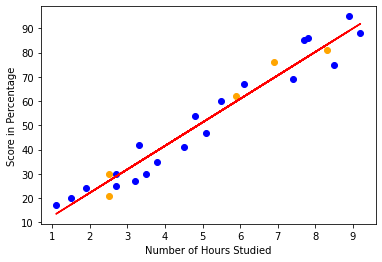

In [72]:
plt.scatter(X_train,y_train,c ="blue")
plt.scatter(X_test,y_test,c='orange')
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.plot(X, line,'red');
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Score in Percentage')
plt.show()

**We can also test with  own data**

In [73]:

hours = [9.25,9.5,9.75,10,10.25,10.5,10.75,11,15]
#converting data to array for prediction
#our input must have same format as X_train or X_test
own_pred = regressor.predict(np.array(hours).reshape(-1,1))
dict={'hours':hours,'Score':own_pred}
pd.DataFrame(dict)

,hours,Score
0,9.25,92.386115
1,9.50,94.806635
2,9.75,97.227154
3,10.00,99.647674
4,10.25,102.068193
5,10.50,104.488713
6,10.75,106.909233
7,11.00,109.329752
8,15.00,148.058065


By seeing above score we can see that it does not generalises well on hours more than 10 hours. We will need more data near the score of 100 and we will have to use polynomial regression or any other non linear regression

In [74]:
from sklearn.ensemble import RandomForestRegressor
RFReg=RandomForestRegressor()
RFReg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Finding predicted score using random forrest regressor and mean squared error and r2 score for data

In [75]:
y_pred=RFReg.predict(X_test)
pred_data_rfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'difference':abs(y_test-y_pred)})  
print(pred_data_rfr)

   Actual  Predicted  difference
0      81  79.180000    1.820000
1      30  27.515833    2.484167
2      21  27.515833    6.515833
3      76  73.440000    2.560000
4      62  62.830000    0.830000


In [76]:
mse_rfr=mean_absolute_error(y_test,y_pred)
r2_rfr=r2_score(y_test,y_pred)
print(mse_rfr,r2_rfr)

2.8419999999999987 0.9798837294168744


Comparing the above mse and r2 score with linear regressor

In general it looks like random forrest regressor has less **mean squared error** and more **r2_score** but we will have to see how good is generalises over data not between range of train data 

In [77]:
dict_comp={'MSE':[mse,mse_rfr],'R2_score':[r2,r2_rfr]}
pd.DataFrame(dict_comp,index=['LR','RFR'])

,MSE,R2_score
LR,3.920751,0.967806
RFR,2.842000,0.979884


Comparing the prediction with actual on whole data 

In [78]:
y_pred=RFReg.predict(X)
pred_data_rfr = pd.DataFrame({'hours':X.reshape(25,), 'Actual': y, 'Predicted': y_pred,'difference':abs(y-y_pred)})  
print(pred_data_rfr)

    hours  Actual  Predicted  difference
0     2.5      21  27.515833    6.515833
1     5.1      47  48.710000    1.710000
2     3.2      27  30.273333    3.273333
3     8.5      75  80.500000    5.500000
4     3.5      30  31.870000    1.870000
5     1.5      20  20.345000    0.345000
6     9.2      88  88.580000    0.580000
7     5.5      60  56.550000    3.450000
8     8.3      81  79.180000    1.820000
9     2.7      25  27.905833    2.905833
10    7.7      85  83.590000    1.410000
11    5.9      62  62.830000    0.830000
12    4.5      41  44.640000    3.640000
13    3.3      42  36.790000    5.210000
14    1.1      17  19.205000    2.205000
15    8.9      95  91.800000    3.200000
16    2.5      30  27.515833    2.484167
17    1.9      24  22.785000    1.215000
18    6.1      67  63.390000    3.610000
19    7.4      69  74.660000    5.660000
20    2.7      30  27.905833    2.094167
21    4.8      54  51.080000    2.920000
22    3.8      35  34.040000    0.960000
23    6.9      7

Random forrest Regressor works well with random data in range of our train data.

Problem arises when when we have data outside the range like study hours of 9.5+ it shows 88.1 constantly. 



In [79]:
own_pred = RFReg.predict(np.array(hours).reshape(-1,1))
dict_own_pred={'hours':hours,'Score':own_pred}
pd.DataFrame(dict_own_pred)

,hours,Score
0,9.25,88.58
1,9.50,88.58
2,9.75,88.58
3,10.00,88.58
4,10.25,88.58
5,10.50,88.58
6,10.75,88.58
7,11.00,88.58
8,15.00,88.58
